### Prepare the data
Prepare dataframe with only relevant columns for exploration and analysis

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import pickle

df_train = pd.read_pickle("../2. Data Preprocessing/processed_data")
df_train.columns = [x[0] for x in df_train.columns]
print(df_train.columns.values)
# print(df_train)

# Obtain id column
df_train.rename(columns={'idid': 'id'}, inplace=True)
df_id = df_train["id"].iloc[:,0:1]
# print(df_id)

['budget' 'music' 'drama' ... 'mona friis bertheussen' 'brian holden'
 'norman stone']


In [154]:
# Check the columns using dtypes
print(df_train.dtypes)
df_train.shape

budget                      int64
music                       int64
drama                       int64
horror                      int64
documentary                 int64
thriller                    int64
comedy                      int64
crime                       int64
western                     int64
romance                     int64
animation                   int64
family                      int64
tv movie                    int64
war                         int64
mystery                     int64
action                      int64
fantasy                     int64
adventure                   int64
science fiction             int64
history                     int64
id                          int64
weekday                   float64
day                       float64
month                     float64
year                      float64
revenue                   float64
runtime                   float64
status                     object
title                      object
vote_average  

(23579, 11938)

In [155]:
# New df for non-text columns
df = df_train.loc[:,["revenue", "budget", "runtime", "vote_average", "vote_count", "weighted_rating", "weekday", "day", "month", "year"]]
df = pd.concat([df, df_id], axis=1)
# Excluded title and status

# total number of rows and columns
print(df.shape)

# Check datatypes
df = df.astype(float)
print(df.dtypes)

# Randomly sample 5 records with .sample(5)
df.sample(999)
# print(df)

(23579, 11)
revenue            float64
budget             float64
runtime            float64
vote_average       float64
vote_count         float64
weighted_rating    float64
weekday            float64
day                float64
month              float64
year               float64
id                 float64
dtype: object


,revenue,budget,runtime,vote_average,vote_count,weighted_rating,weekday,day,month,year,id
4562,9778300.0,0.0,70.0,0.0,0.0,7.000000,1.0,10.0,7.0,2028.0,392429.0
20088,7201701.0,3.0,110.0,5.3,14.0,6.999049,5.0,3.0,6.0,2011.0,75657.0
16369,376057.0,0.0,100.0,6.5,17.0,6.999660,5.0,22.0,9.0,2006.0,16018.0
12998,215294342.0,25000000.0,90.0,4.4,78.0,6.991913,5.0,10.0,7.0,1998.0,6058.0
15515,120500.0,0.0,109.0,7.4,17.0,7.000272,7.0,1.0,1.0,2006.0,13174.0
14954,18254702.0,19000000.0,104.0,7.6,355.0,7.008401,5.0,13.0,10.0,1989.0,11562.0
17567,69055695.0,32000000.0,107.0,6.2,566.0,6.982289,4.0,26.0,8.0,2010.0,22907.0
9599,79800.0,0.0,101.0,5.3,32.0,6.997827,7.0,8.0,2.0,2015.0,308077.0
7270,679866.0,0.0,NaN,0.0,0.0,7.000000,5.0,14.0,4.0,1978.0,461792.0
7476,26400.0,0.0,100.0,0.0,0.0,7.000000,5.0,22.0,12.0,2017.0,467180.0


### Explore the data
Perform summary statistics, missing value count, correlation analysis

In [156]:
# Get summary statistics using .describe()
df.describe()

,revenue,budget,runtime,vote_average,vote_count,weighted_rating,weekday,day,month,year,id
count,2.357900e+04,2.357900e+04,2.126200e+04,23579.000000,23579.000000,23579.000000,22561.000000,22561.000000,22561.000000,22561.000000,23579.000000
mean,1.908478e+14,1.065739e+07,1.970529e+03,4.345782,237.647780,6.998824,4.213111,13.893932,6.274589,1999.368955,230321.310531
std,2.930555e+16,3.507535e+07,2.743197e+05,3.077040,918.773307,0.024323,1.610958,9.326888,3.646406,19.845593,197096.804433
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,6.708784,1.000000,1.000000,1.000000,1887.000000,5.000000
25%,1.000000e+05,0.000000e+00,8.100000e+01,0.000000,0.000000,6.999201,3.000000,6.000000,3.000000,1992.000000,20205.000000
50%,3.840800e+06,0.000000e+00,9.500000e+01,5.600000,4.000000,7.000000,5.000000,13.000000,6.000000,2006.000000,213603.000000
75%,3.383076e+07,6.650000e+06,1.090000e+02,6.700000,72.000000,7.000000,5.000000,22.000000,9.000000,2014.000000,412639.000000
max,4.500000e+18,3.500050e+09,4.000000e+07,10.000000,19042.000000,7.584377,7.000000,31.000000,12.000000,2029.000000,584244.000000


In [157]:
# Missing Values Summary
# total row counts
# df['revenue'].value_counts()
print(df.count())

# NaN values count
print(df.isna().sum())

# Zero values count
print((df == 0).sum())

# df = df.fillna(0)

revenue            23579
budget             23579
runtime            21262
vote_average       23579
vote_count         23579
weighted_rating    23579
weekday            22561
day                22561
month              22561
year               22561
id                 23579
dtype: int64
revenue               0
budget                0
runtime            2317
vote_average          0
vote_count            0
weighted_rating       0
weekday            1018
day                1018
month              1018
year               1018
id                    0
dtype: int64
revenue                0
budget             14345
runtime                0
vote_average        7130
vote_count          7087
weighted_rating        0
weekday                0
day                    0
month                  0
year                   0
id                     0
dtype: int64


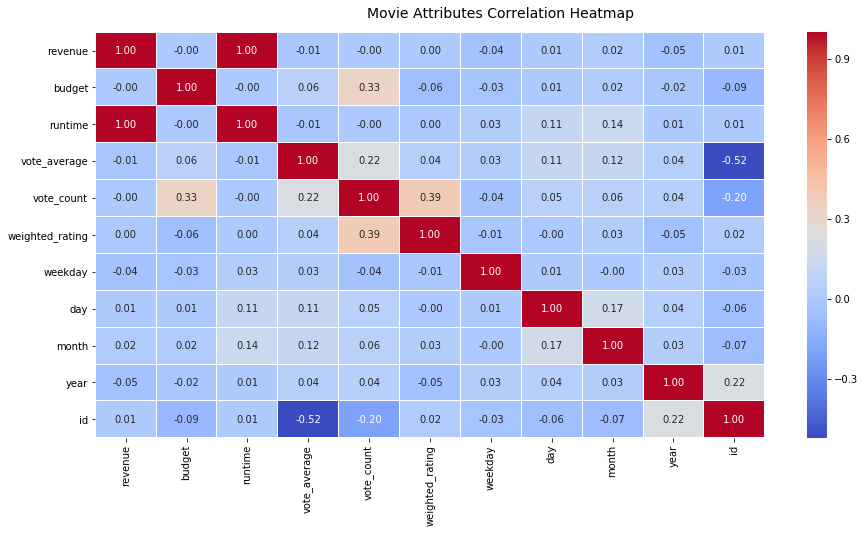

In [158]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap', fontsize=14)

### Remove Outliers & Old Movies (before 1980)

In [159]:
# Outlier detection method (3 sd)
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

# Outlier detection
outlier_datapoints = detect_outlier(df['revenue'])
print(outlier_datapoints)
print("revenue")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['revenue']))

outlier_datapoints1 = detect_outlier(df['budget'])
# print(outlier_datapoints1)
print("budget")
print("Number of Outliers: %d" % len(outlier_datapoints1))
print("Number of Data Points: %d" % len(df['budget']))

outlier_datapoints2 = detect_outlier(df['runtime'])
# print(outlier_datapoints2)
print("runtime")
print("Number of Outliers: %d" % len(outlier_datapoints2))
print("Number of Data Points: %d" % len(df['runtime']))

outlier_datapoints3 = detect_outlier(df['weighted_rating'])
# print(outlier_datapoints3)
print("weighted_rating")
print("Number of Outliers: %d" % len(outlier_datapoints3))
print("Number of Data Points: %d" % len(df['weighted_rating']))

[4.5e+18]
revenue
Number of Outliers: 1
Number of Data Points: 23579
budget
Number of Outliers: 340
Number of Data Points: 23579
runtime
Number of Outliers: 341
Number of Data Points: 23579
weighted_rating
Number of Outliers: 728
Number of Data Points: 23579


In [160]:
print(outlier_datapoints[0])
df_out = df[df.revenue != outlier_datapoints[0]]

df_out['revenue'].describe()
# df['revenue'].describe()

4.5e+18


count    2.357800e+04
mean     4.118401e+07
std      1.105546e+08
min      1.000000e+00
25%      1.000000e+05
50%      3.840800e+06
75%      3.382124e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [161]:
print(df['year'].describe())
df_out = df_out[df_out.year >= 1980 ]

print(df_out.count())

count    22561.000000
mean      1999.368955
std         19.845593
min       1887.000000
25%       1992.000000
50%       2006.000000
75%       2014.000000
max       2029.000000
Name: year, dtype: float64
revenue            19560
budget             19560
runtime            18041
vote_average       19560
vote_count         19560
weighted_rating    19560
weekday            19560
day                19560
month              19560
year               19560
id                 19560
dtype: int64


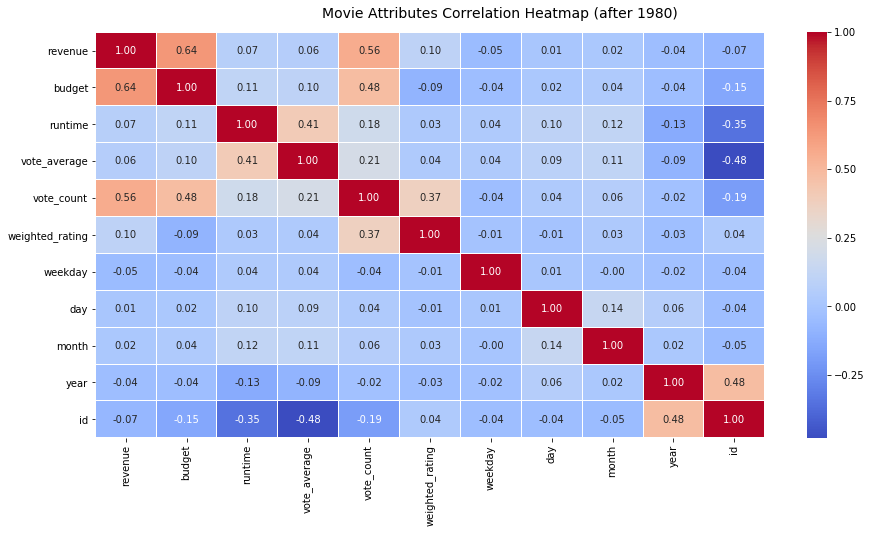

In [162]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df_out.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap (after 1980)', fontsize=14)

### Data Transformation

In [142]:
from sklearn.preprocessing import StandardScaler

# print(df_out.shape)
# print(df_out.columns.values)

scaler = StandardScaler()
transform = scaler.fit_transform(df_out.iloc[:,:6])
transform = pd.DataFrame(transform)
transform.columns = ['revenue', 'budget', 'runtime', 'vote_average', 'vote_count', 'weighted_rating']
transform = transform.reset_index(drop=True)
print(transform.shape)

unchanged = df_out.iloc[:,6:]
unchanged = unchanged.reset_index(drop=True)
print(unchanged.shape)

df_out = pd.merge(left=transform, left_index=True, right=unchanged, right_index=True, how='left')
# print(df_out)

(19560, 6)
(19560, 5)


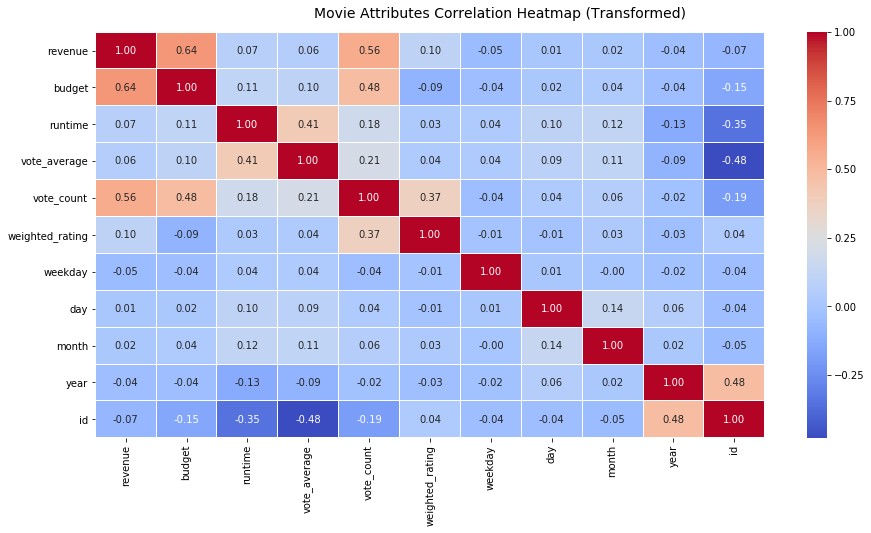

In [144]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df_out.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap (Transformed)', fontsize=14)

### Assign Revenue Bins

In [145]:
# Binning Revenue
revenuearray = df_out[['revenue']].copy()
revenuearray = revenuearray.values.tolist()
revenuearray = [j for sub in revenuearray for j in sub]
revenuearray.sort()
# print(revenuearray)

length = len(revenuearray)
# print(length)
indexrange = []
binsize = int(length/5)
minvalue=0
lastvalue=0

for i in range(0,5): #5 bins
    minvalue = i * binsize
    if (lastvalue == 0):
        print()
        lastvalue = (i+1)*binsize-1
        indexrange.append(minvalue)
    else:
        for j in range(0, binsize):
            if (revenuearray[minvalue + j] != revenuearray[lastvalue]):
                lastvalue = (i+1)*binsize-1
                indexrange.append(minvalue + j)
                break

# print(indexrange)
bin1 = revenuearray[indexrange[0]:indexrange[1]]
bin2 = revenuearray[indexrange[1]:indexrange[2]]
bin3 = revenuearray[indexrange[2]:indexrange[3]]
bin4 = revenuearray[indexrange[3]:indexrange[4]]
bin5 = revenuearray[indexrange[4]:]

# Use the following print statements to adjust and even out the bins manually:
arrayrange = [[bin1[0],bin1[len(bin1)-1]], [bin2[0],bin2[len(bin2)-1]], [bin3[0],bin3[len(bin3)-1]], [bin4[0],bin4[len(bin4)-1]], [bin5[0],bin5[len(bin5)-1]]]
print(arrayrange)

print(len(bin1))
print(len(bin2))
print(len(bin3))
print(len(bin4))
print(len(bin5))

# print(bin1)
# print("-----")
# print(bin2)
# print("-----")
# print(bin3)
# print("-----")
# print(bin4)
# print("-----")
# print(bin5)


[[-0.3692609363549103, -0.368896260964967], [-0.3688953377127583, -0.36174105634697573], [-0.36171620239751556, -0.280668461087761], [-0.2806287335452175, 0.054439915357388444], [0.054666638402296845, 25.370688299962172]]
3914
3915
3908
3911
3912


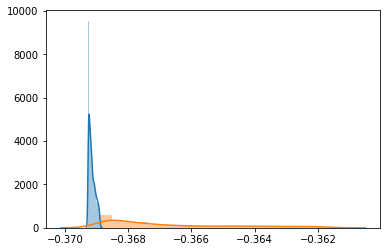

In [146]:
# Ignore overlapping part of line
sns.distplot(bin1);
sns.distplot(bin2);
# sns.distplot(bin3);
# sns.distplot(bin4);
# sns.distplot(bin5);

In [147]:
# Per revenue bin, obtain chunked df
df1 = df_out.loc[df_out['revenue'].isin(bin1)]
print(df1.shape)
df2 = df_out.loc[df_out['revenue'].isin(bin2)]
print(df2.shape)
df3 = df_out.loc[df_out['revenue'].isin(bin3)]
print(df3.shape)
df4 = df_out.loc[df_out['revenue'].isin(bin4)]
print(df4.shape)
df5 = df_out.loc[df_out['revenue'].isin(bin5)]
print(df5.shape)

(3914, 11)
(3915, 11)
(3908, 11)
(3911, 11)
(3912, 11)


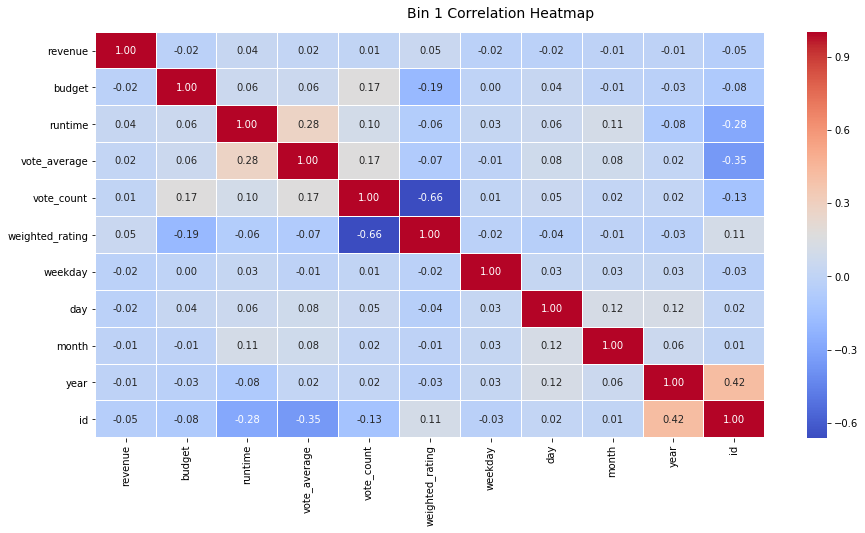

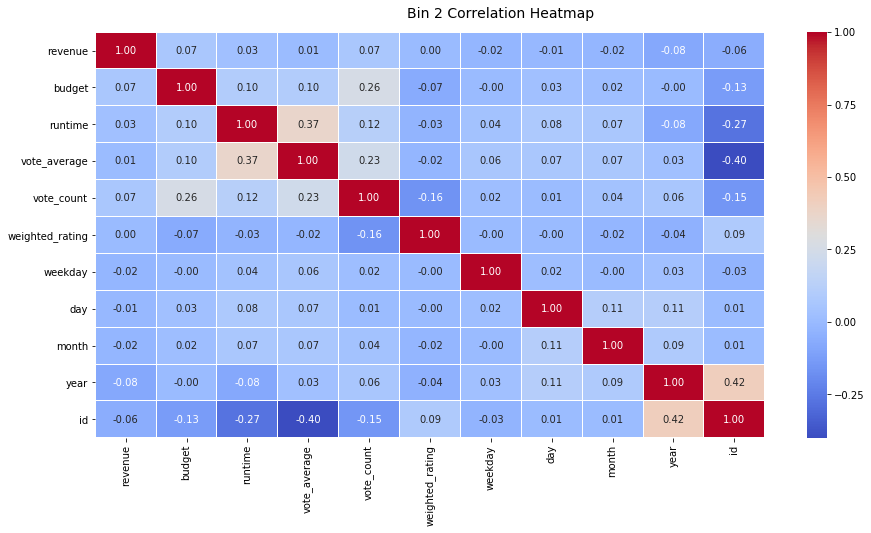

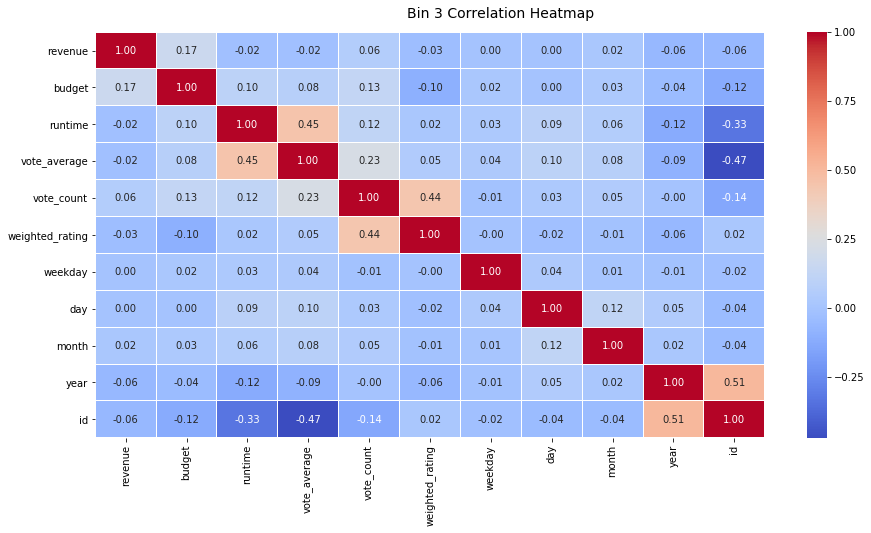

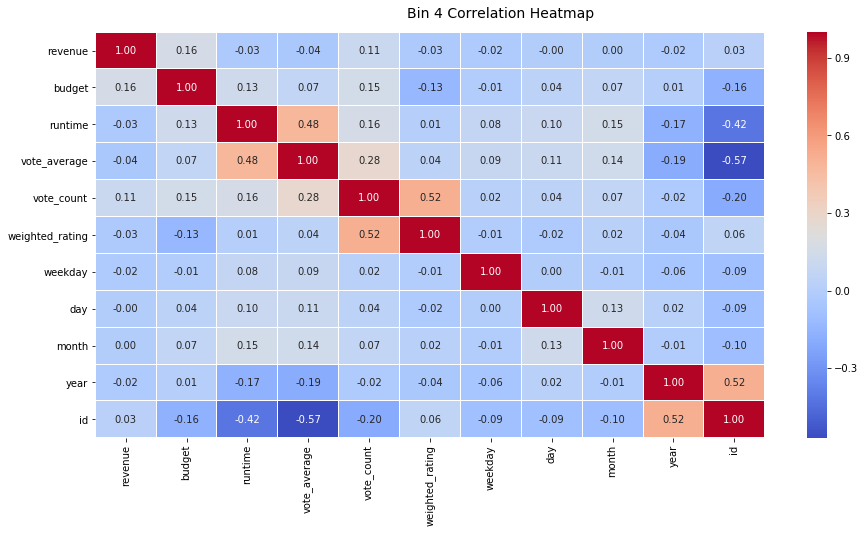

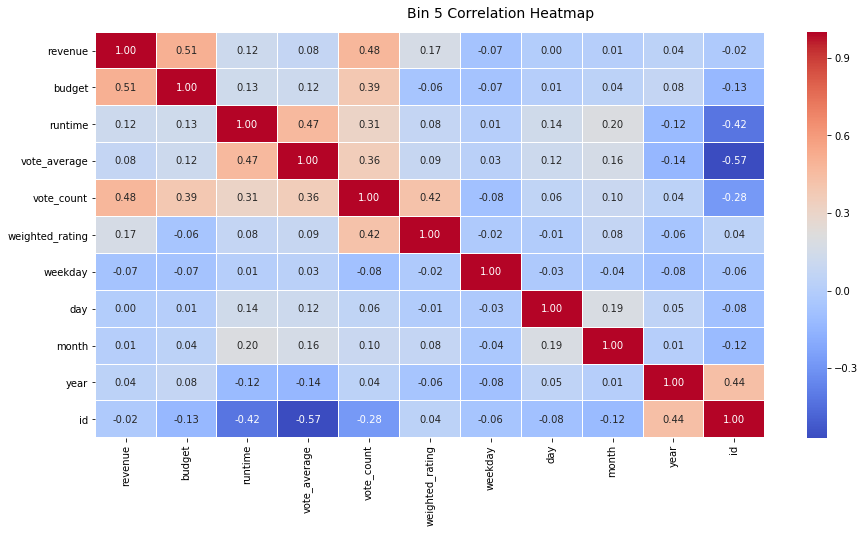

In [148]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 1 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df2.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 2 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df3.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 3 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df4.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 4 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df5.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 5 Correlation Heatmap', fontsize=14)

In [149]:
# Assign class labels (bin)
df_out.loc[df_out['revenue'].isin(bin1), 'bin'] = 1
df_out.loc[df_out['revenue'].isin(bin2), 'bin'] = 2
df_out.loc[df_out['revenue'].isin(bin3), 'bin'] = 3
df_out.loc[df_out['revenue'].isin(bin4), 'bin'] = 4
df_out.loc[df_out['revenue'].isin(bin5), 'bin'] = 5

print(df_out)
# df_out = df_out.drop("bin", axis=1) # In case need to drop column

        revenue    budget   runtime  vote_average  vote_count  \
0     -0.369158 -0.403796  0.746530     -1.555632   -0.272926   
1     -0.231702  0.222897       NaN     -1.555632   -0.272926   
2     -0.365102 -0.403796 -1.840120     -1.555632   -0.272926   
3     -0.211010 -0.403796 -1.814253      0.821640   -0.270895   
4      0.510880 -0.274771 -0.029465      0.176380   -0.228257   
5     -0.369175 -0.403796       NaN      0.583913   -0.269880   
6      1.963909  2.729669  0.539598      0.142419   -0.271911   
7     -0.177552 -0.403796 -0.029465     -1.555632   -0.272926   
8      0.904313  1.439419  1.005195      0.685796    1.100652   
9     -0.362466 -0.403796 -2.150518     -1.555632   -0.272926   
10    -0.368453 -0.403796  0.048134      0.074497   -0.021154   
11    -0.280668 -0.403796 -1.064125     -1.555632   -0.272926   
12    -0.330928 -0.403796 -1.607321     -1.555632   -0.272926   
13     0.410143  1.439419 -0.055332     -1.555632   -0.272926   
14    -0.357779 -0.403796

### Export Final Dataframe to File

In [150]:
# Drop columns where correlation to revenue is <= (+-)0.1 across all bins
df_out = df_out.drop(['revenue', 'runtime', 'vote_average', 'weighted_rating', 'weekday', 'day', 'month', 'year'], 1)
print(df_out)

         budget  vote_count        id  bin
0     -0.403796   -0.272926  480024.0  1.0
1      0.222897   -0.272926  480035.0  4.0
2     -0.403796   -0.272926  480087.0  2.0
3     -0.403796   -0.270895  480206.0  4.0
4     -0.274771   -0.228257  480210.0  5.0
5     -0.403796   -0.269880  480245.0  1.0
6      2.729669   -0.271911  480448.0  5.0
7     -0.403796   -0.272926  480513.0  4.0
8      1.439419    1.100652  480530.0  5.0
9     -0.403796   -0.272926  480561.0  2.0
10    -0.403796   -0.021154  480572.0  2.0
11    -0.403796   -0.272926  480609.0  3.0
12    -0.403796   -0.272926  480682.0  3.0
13     1.439419   -0.272926  480708.0  5.0
14    -0.403796   -0.271911  480718.0  3.0
15    -0.403796   -0.272926  480782.0  3.0
16    -0.403796   -0.272926  480784.0  4.0
17    -0.403796   -0.272926  480794.0  1.0
18    -0.403796   -0.272926  480873.0  1.0
19    -0.403796   -0.253637  480881.0  3.0
20    -0.403796   -0.271911  480884.0  5.0
21    -0.035153   -0.272926  480928.0  4.0
22     0.62

In [151]:
df_out.to_pickle("explored_data")

In [152]:
# Check saved dataframe
test = pd.read_pickle("explored_data")
print(test.columns.values)
print(test.dtypes)
print(test)

['budget' 'vote_count' 'id' 'bin']
budget        float64
vote_count    float64
id            float64
bin           float64
dtype: object
         budget  vote_count        id  bin
0     -0.403796   -0.272926  480024.0  1.0
1      0.222897   -0.272926  480035.0  4.0
2     -0.403796   -0.272926  480087.0  2.0
3     -0.403796   -0.270895  480206.0  4.0
4     -0.274771   -0.228257  480210.0  5.0
5     -0.403796   -0.269880  480245.0  1.0
6      2.729669   -0.271911  480448.0  5.0
7     -0.403796   -0.272926  480513.0  4.0
8      1.439419    1.100652  480530.0  5.0
9     -0.403796   -0.272926  480561.0  2.0
10    -0.403796   -0.021154  480572.0  2.0
11    -0.403796   -0.272926  480609.0  3.0
12    -0.403796   -0.272926  480682.0  3.0
13     1.439419   -0.272926  480708.0  5.0
14    -0.403796   -0.271911  480718.0  3.0
15    -0.403796   -0.272926  480782.0  3.0
16    -0.403796   -0.272926  480784.0  4.0
17    -0.403796   -0.272926  480794.0  1.0
18    -0.403796   -0.272926  480873.0  1.0
19 

### Other Visualisations / Analyses
Visualisations plotted / analyses done but were unable to draw insights from

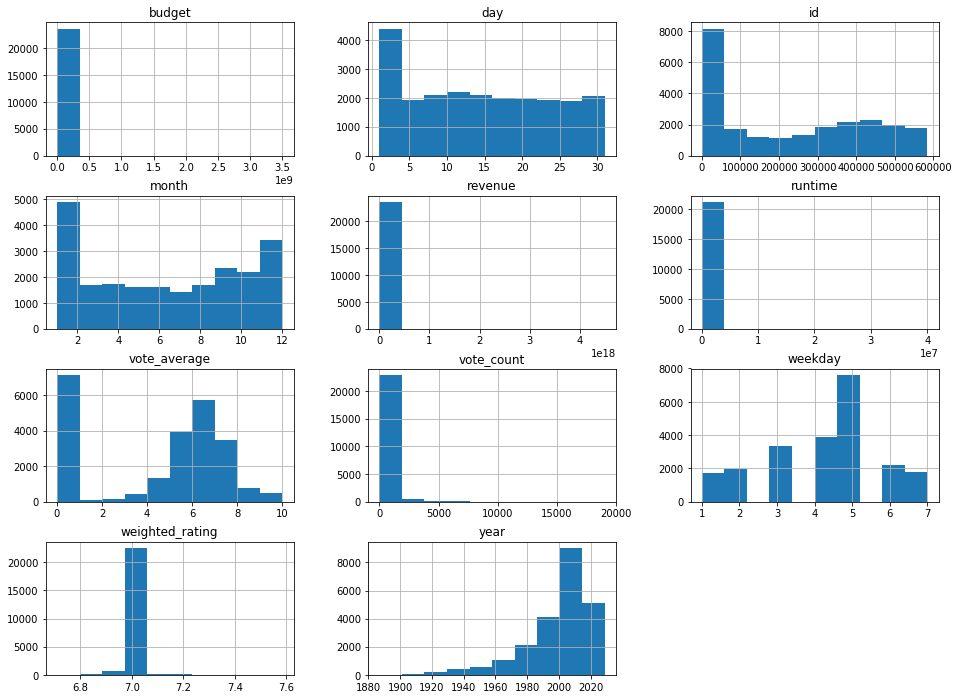

In [5]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,12]
# Plot histograms for all attributes
df.hist()
plt.show()

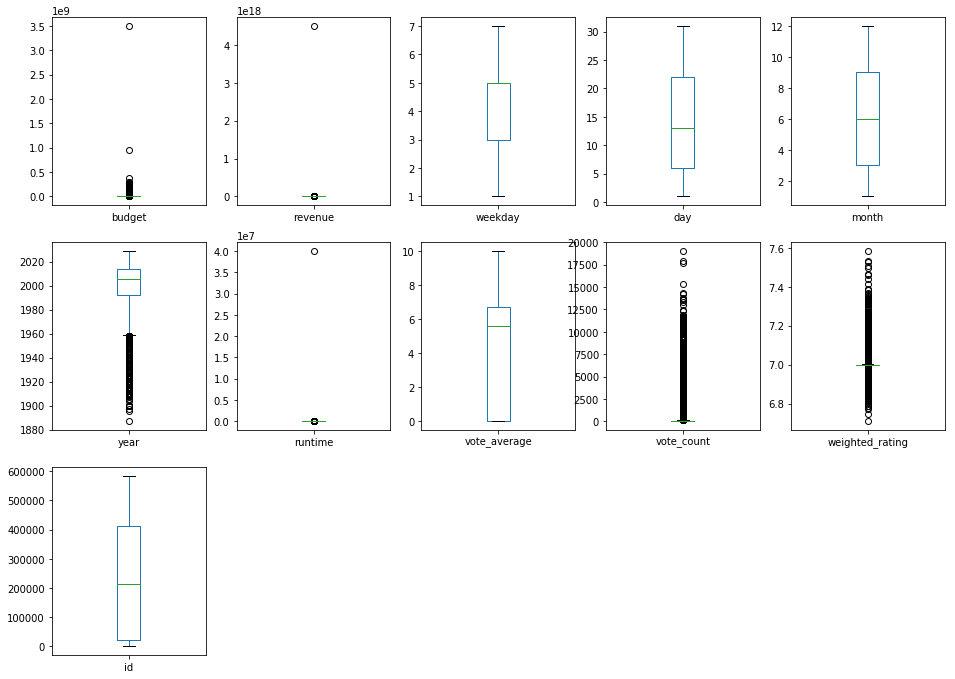

In [6]:
# Set the size of the figure
# Plot boxplots for all attributes

plt.rcParams["figure.figsize"] = [16,20]
df.plot(kind='box', subplots=True, layout=(5,5))
plt.show()

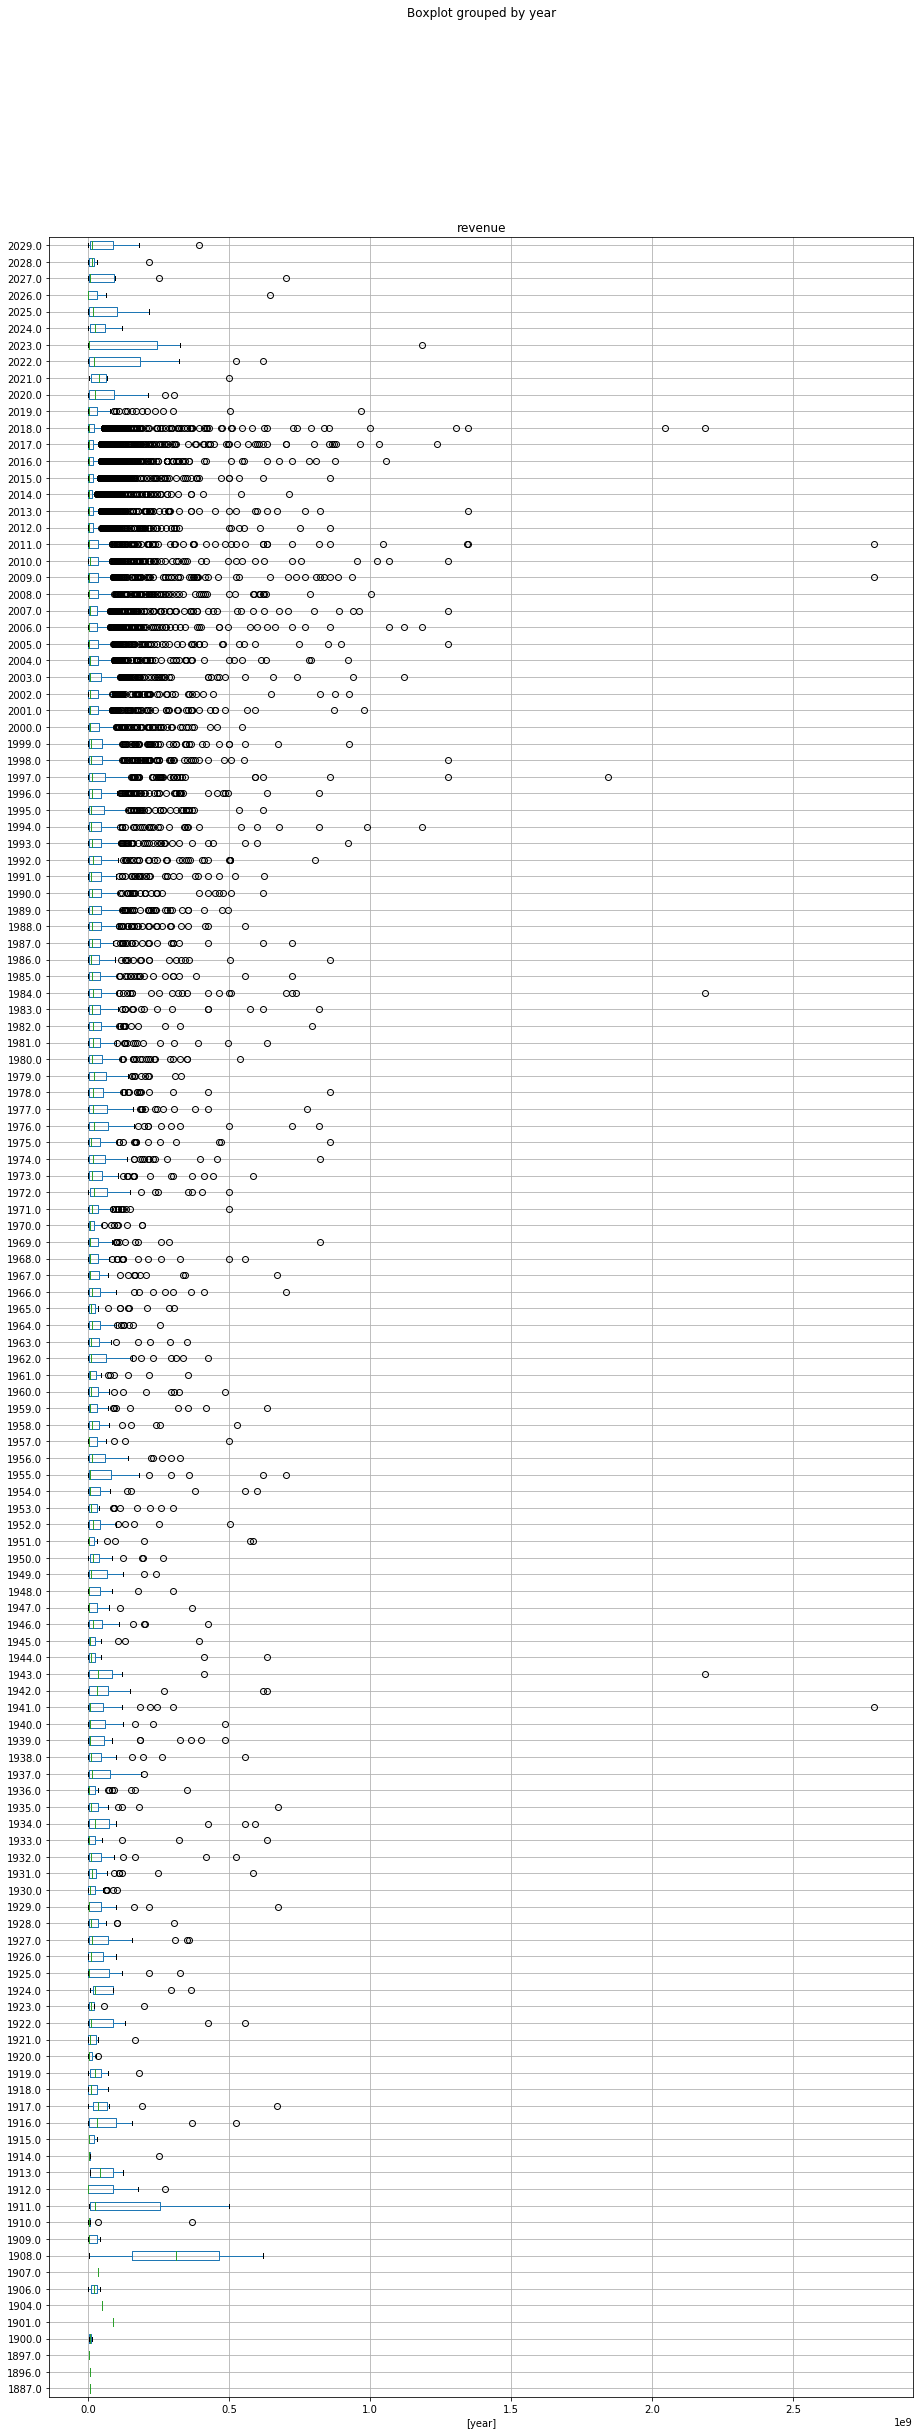

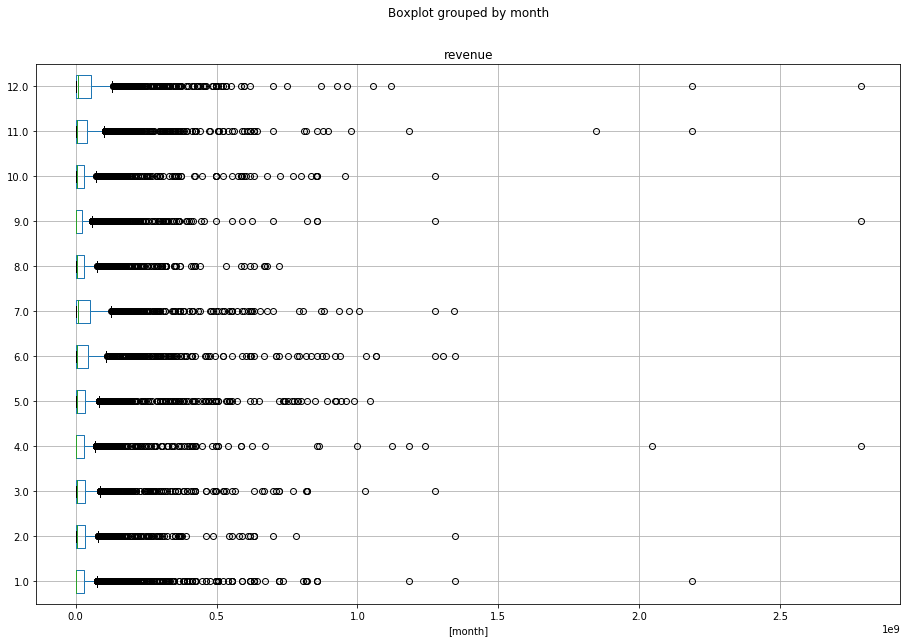

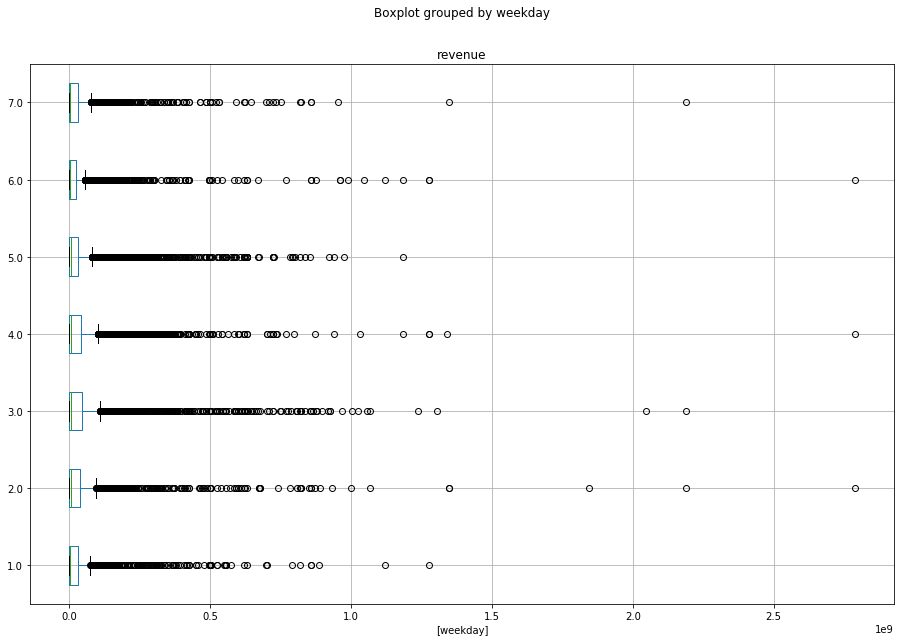

In [7]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 40]
# Plot a boxplot for a specific attributes
df[['revenue', "year"]].boxplot(vert=False, by='year')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue', "month"]].boxplot(vert=False, by='month')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue',"weekday"]].boxplot(vert=False, by='weekday')
plt.show()

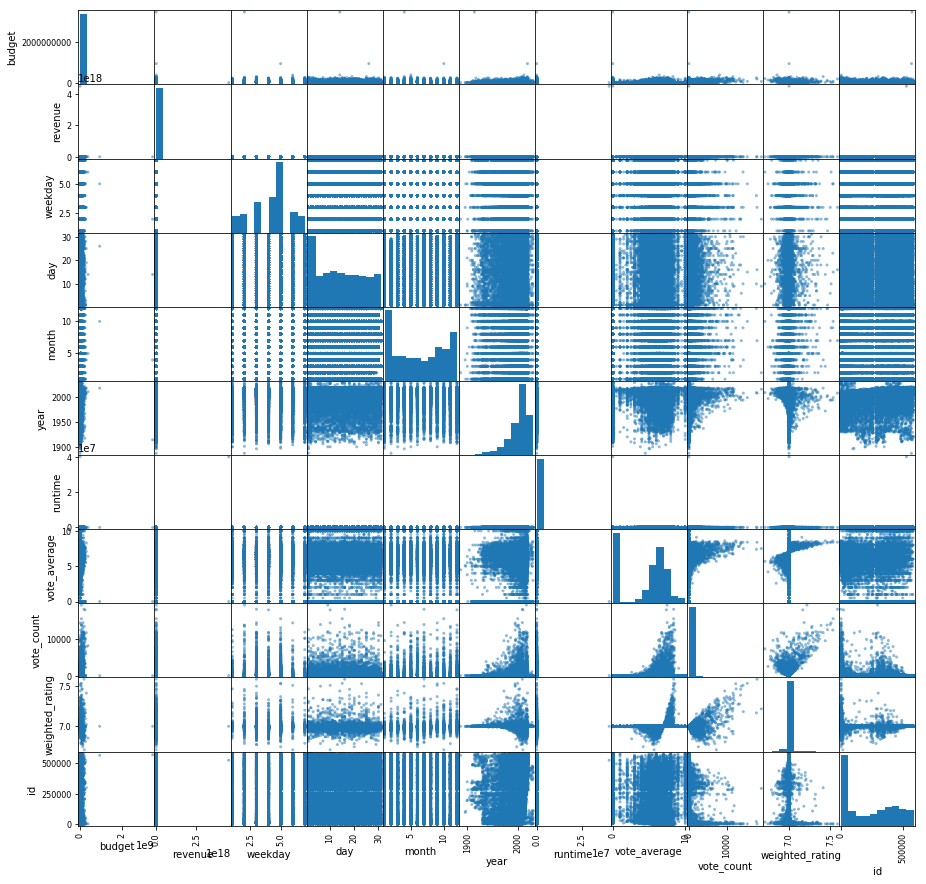

In [8]:
# Set the size of the figure
# Plot correlation scatter matrix

pd.scatter_matrix(df, figsize=(15, 15))
plt.show()

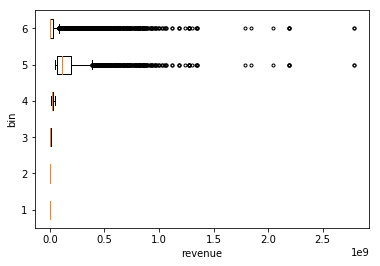

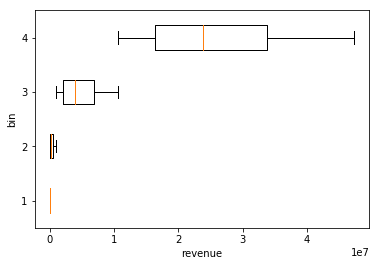

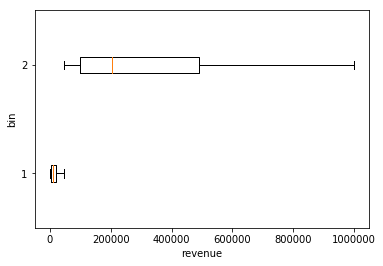

In [35]:
# Binning Revenue
revenuearray = df[['revenue']].copy()
revenuearray = revenuearray.values.tolist()
revenuearray = [j for sub in revenuearray for j in sub]
revenuearray.sort()
# print(revenuearray)

length = len(revenuearray)
# print(length)
indexrange = []
binsize = int(length/5)
minvalue=0
lastvalue=0

for i in range(0,5): #5 bins
    minvalue = i * binsize
    if (lastvalue == 0):
        print()
        lastvalue = (i+1)*binsize-1
        indexrange.append(minvalue)
    else:
        for j in range(0, binsize):
            if (revenuearray[minvalue + j] != revenuearray[lastvalue]):
                lastvalue = (i+1)*binsize-1
                indexrange.append(minvalue + j)
                break

# print(indexrange)
bin1 = revenuearray[indexrange[0]:indexrange[1]]
bin2 = revenuearray[indexrange[1]:indexrange[2]]
bin3 = revenuearray[indexrange[2]:indexrange[3]]
bin4 = revenuearray[indexrange[3]:indexrange[4]]
bin5 = revenuearray[indexrange[4]:]

# Use the following print statements to adjust and even out the bins manually:
# arrayrange = [[bin1[0],bin1[len(bin1)-1]], [bin2[0],bin2[len(bin2)-1]], [bin3[0],bin3[len(bin3)-1]], [bin4[0],bin4[len(bin4)-1]], [bin5[0],bin5[len(bin5)-1]]]
# print(arrayrange)

# print(len(bin1))
# print(len(bin2))
# print(len(bin3))
# print(len(bin4))
# print(len(bin5))

# print(bin1)
# print("-----")
# print(bin2)
# print("-----")
# print(bin3)
# print("-----")
# print(bin4)
# print("-----")
# print(bin5)

# Visualising spread of bins (bin 5 largest range > bin 1 smallest range):
revenue_bins = [bin1, bin2, bin3, bin4, bin5[:len(bin5)-2], revenuearray[:len(revenuearray)-2]] #remove largest outlier for plot to show

fig, ax = plt.subplots()
pos = np.array(range(len(revenue_bins))) + 1
bp = ax.boxplot(revenue_bins, positions=pos, vert=False)

ax.set_xlabel('revenue')
ax.set_ylabel('bin')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()

revenue_bins2 = [bin1, bin2, bin3, bin4]

fig2, ax2 = plt.subplots()
pos2 = np.array(range(len(revenue_bins2))) + 1
bp2 = ax2.boxplot(revenue_bins2, positions=pos2, vert=False)

ax2.set_xlabel('revenue')
ax2.set_ylabel('bin')
plt.setp(bp2['whiskers'], color='k', linestyle='-')
plt.setp(bp2['fliers'], markersize=3.0)
plt.show()

revenue_bins3 = [bin1, bin2]

fig3, ax3 = plt.subplots()
pos3 = np.array(range(len(revenue_bins3))) + 1
bp3 = ax3.boxplot(revenue_bins3, positions=pos3, vert=False)

ax3.set_xlabel('revenue')
ax3.set_ylabel('bin')
plt.setp(bp3['whiskers'], color='k', linestyle='-')
plt.setp(bp3['fliers'], markersize=3.0)
plt.show()

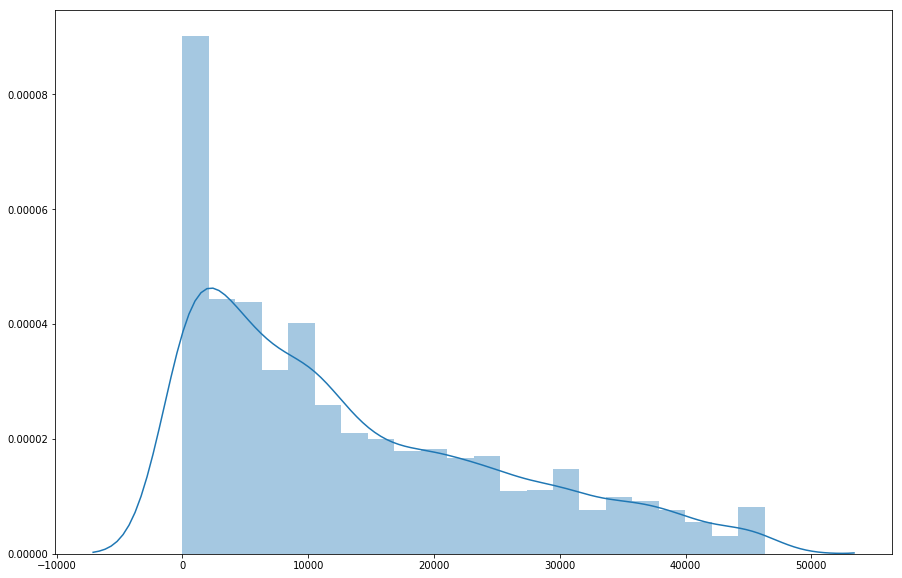

In [15]:
# histogram of each bin
sns.distplot(bin1);
# sns.distplot(bin2);
# sns.distplot(bin3);
# sns.distplot(bin4);
# sns.distplot(bin5);

In [71]:
#skewness and kurtosis - sub in values to try
print("Skewness: %f" % df['revenue'].skew())
print("Kurtosis: %f" % df['revenue'].kurt()) # peak sharpness

Skewness: 153.554551
Kurtosis: 23579.000000
